In [1]:
from astropy.table import Table
import numpy as np
from matplotlib import pyplot as plt


In [3]:
print(out_table)

plateifu nsaid smoothness ttype tidal ... y0_err vsys vsys err chi2 fit flag
-------- ----- ---------- ----- ----- ... ------ ---- -------- ---- --------


ValueError: Unable to insert row because of exception in column 'plateifu':
could not convert string to float: 'test'

In [12]:
print(out_table)

plateifu nsaid smoothness ttype tidal ... y0_err vsys vsys err chi2 fit flag
-------- ----- ---------- ----- ----- ... ------ ---- -------- ---- --------
     nan   nan        nan   nan   nan ...    nan  nan      nan  nan      nan


In [15]:
x = [0,2,3,4]

In [16]:
a,b,c,d = x

In [17]:
print(a)
print(c)

0
3


In [23]:
x = Table(names=('a','b','c'))

In [25]:
x.add_row((3,4,3))

In [2]:

MANGA_FOLDER = '/scratch/kdougla7/data/SDSS/dr17/manga/spectro/'
DRP_FILENAME = MANGA_FOLDER + 'redux/v3_1_1/' + 'drpall-v3_1_1.fits'
RUN_ALL_GALAXIES = False
FILE_IDS = ['10001-3702','7815-3702',  '7990-6104',\
        '7992-6104', '8077-12704', '8077-6102',\
        '8082-12702', '8082-9102',  '8146-1901',\
        '8150-9102']

In [3]:
DRP_table = Table.read( DRP_FILENAME, format='fits')




In [4]:
MORPH_FILE = '/home/lstroud3/Documents/manga_visual_morpho-2.0.1.fits'

In [7]:
DRP_table = Table.read( DRP_FILENAME, format='fits')
DRP_index = {}
for i in range(len(DRP_table)):
    galaxy_ID = DRP_table['plateifu'][i]
    DRP_index[galaxy_ID] = i
    if RUN_ALL_GALAXIES or galaxy_ID in FILE_IDS:
        index.append(i)

Morph_table = Table.read(MORPH_FILE, format='fits')
Morph_index = {}

for i in range(len(Morph_table)):
    galaxy_ID = Morph_table['plateifu'][i].strip()
    Morph_index[galaxy_ID] = i

In [9]:
index = []
for m_ID in Morph_table['plateifu']:
    if m_ID in DRP_table['plateifu']:
        index.append(DRP_index[m_ID])
x = Table(DRP_table[index])

In [16]:
index = []
for m_ID in Morph_table['plateifu']:
    if m_ID.strip() in DRP_table['plateifu']:
        index.append(DRP_index[m_ID.strip()])
x = Table(DRP_table[index])

In [20]:
print(min(x['mngtarg1']))


0


In [22]:
x = Table.read('/scratch/lstroud3/RotationCurves/Images/Isothermal/batch0', format='fits')

In [31]:
x.sort('fit flag)

In [55]:
print(x['plateifu','fit flag','chi2'][90:123])
np.nanmax(x['chi2'])

  plateifu  fit flag         chi2       
----------- -------- -------------------
 10213-9101      2.0  63.436452977328265
 10213-6103      3.0 0.47124370232363577
10218-12701      3.0  2.4935868418551888
 10215-6104      3.0  405.81249273650445
10219-12705      4.0  23.917610727234173
 10216-9102      4.0  0.1567318966479126
 10213-1902      4.0   188.0469164579495
10216-12701      4.0   9.531531038242003
10001-12702      4.0 0.07933479197645509
 10218-9102      5.0  1.2622270863101714
        ...      ...                 ...
10219-12704     15.0  27.551039982413776
 10217-3704     18.0  0.9909745891345214
10218-12705     23.0   0.631975297947636
10218-12702     26.0   4.586019448818854
 10214-1901     28.0  1.1030075536617299
 10216-6103     28.0  23.494784480893074
10214-12703     34.0  0.5849566019475652
10216-12702     38.0  21.447919232536012
10001-12705     38.0  31.359897354031972
 10216-6101     39.0  2.7239990992171346
 10217-3701     47.0   29.10506583258679
Length = 33 rows

405.81249273650445

In [65]:
y = x['plateifu','fit flag','chi2'][0:123]
y.sort('chi2')
print(y[0:40])

  plateifu  fit flag         chi2       
----------- -------- -------------------
10001-12702      4.0 0.07933479197645509
 10216-9102      4.0  0.1567318966479126
10216-12703      8.0  0.3037669456773596
 10213-6103      3.0 0.47124370232363577
10214-12703     34.0  0.5849566019475652
10218-12705     23.0   0.631975297947636
 10217-3704     18.0  0.9909745891345214
 10214-1901     28.0  1.1030075536617299
 10214-6104      5.0  1.1439683113450223
 10215-9101      6.0   1.199486974446803
        ...      ...                 ...
 10217-3701     47.0   29.10506583258679
10001-12705     38.0  31.359897354031972
 10213-9101      2.0  63.436452977328265
 10215-3701     11.0   71.38796676296846
 10218-3701      0.0    78.2607183292039
 10218-9101     15.0  125.71912094279688
 10215-3702      2.0   130.3998550603301
10215-12703      0.0  133.37631234573655
 10213-1902      4.0   188.0469164579495
10213-12705     10.0    247.496846634291
 10215-6104      3.0  405.81249273650445
Length = 40 rows

In [43]:
disk_fail = 0
tot_fail = 0
max_it = 0
converge = 0
for flag in x['fit flag'][0:123]:
    if flag == -6:
         tot_fail +=1
    elif flag == -5:
        disk_fail +=1
    elif flag == 0:
        max_it += 1
    elif flag > 0:
        converge +=1

print(disk_fail,tot_fail,max_it,converge)

12 5 5 35


In [66]:
np.floor(3/2)

1.0

In [66]:
values = y[0:40]

In [71]:
iterate = np.array(values['fit flag'])
chi2 = np.array(values['chi2'])

for i in range(len(iterate)):
    if iterate[i] == 0:
        iterate[i] = 50

Text(0, 0.5, 'Chi2')

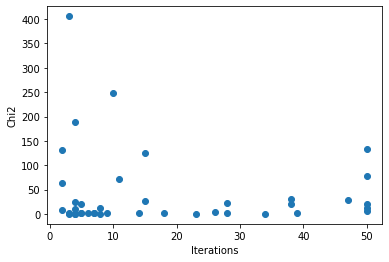

In [75]:
plt.scatter(iterate,chi2)
plt.xlabel('Iterations')
plt.ylabel('Chi2')

In [76]:
test = Table.read('/scratch/lstroud3/RotationCurves/Images/Isothermal/test', format='fits')

In [84]:
print(test[0:20])

plate ifudsgn   plateifu  ...       vsys err             chi2        fit flag
----- ------- ----------- ... ------------------- ------------------ --------
10218    3702  10218-3702 ...                 nan                nan     -1.0
10218    3703  10218-3703 ...                 nan                nan     -5.0
10218    3704  10218-3704 ...                 nan                nan     -6.0
10218    6101  10218-6101 ...                 nan                nan     -1.0
10218    6102  10218-6102 ...                 nan                nan     -2.0
10218    6103  10218-6103 ...                 nan                nan     -3.0
10218    6104  10218-6104 ...                 nan                nan     -3.0
10218    9101  10218-9101 ...  1.7308454107050255  125.7191233152829     15.0
10218    9102  10218-9102 ... 0.43119358465460805 1.2622270864430483      5.0
10219   12701 10219-12701 ...  0.1450060656619638 2.4353815670265977      5.0
10219   12702 10219-12702 ... 0.09577111881633064  10.2219143264